In [7]:
import glob, os
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
def get_precision_recall(A, B):

    retrieved_list = A['opcs'].drop_duplicates()
    target_list = B['code'].str.replace('.','').drop_duplicates()
    
    total_codes_retrieved = len(retrieved_list)
    target_codes_retrieved = sum(retrieved_list.isin(target_list))
    total_target_codes = len(target_list)
    

    # precision = relevant retrieved instances / all retrieved instances
    # 'how many of the retrieved codes were in CORECT-R'
    precision = ( target_codes_retrieved / total_codes_retrieved ) * 100
    print('   Precision: ',round(precision,2), '  ',target_codes_retrieved,' out of ',total_codes_retrieved,'codes retrieved were relevant')

    # recall = relevant retrieved instances / all relevant instances
    # 'how many of the CORECT-R codes were retrieved?'
    recall = ( target_codes_retrieved / total_target_codes ) * 100
    print('   Recall:    ',round(recall,2), '  ',target_codes_retrieved,' out of ',total_target_codes,' CORECT codes found')

    return precision, recall

In [9]:
# Get codelists to compare against
comparison_sets = [['appendix', 'hdruk/Appendicitis'], 
                   ['cataract', 'hdruk/Cataract'], 
                   #['divert', 'hdruk/Diverticular_disease_of_intestine'], 
                   ['glaucoma', 'hdruk/Glaucoma']]
recall_matrix    = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = range(0,4))
precision_matrix = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = range(0,4))


In [10]:


# Get source codelists

for s in comparison_sets:
    print('--- Comparing '+s[0]+' codelist against '+s[1]+' standard')
    files = sorted( list( glob.glob("codelists/output/query_"+s[0]+"*_opcs.csv") ) )

    try:
        benchmark_list = pd.read_csv('codelists/'+s[1]+".csv")

        i=0
        for f in files: 
            print(f)
            codelist = pd.read_csv(f)
            p, r = get_precision_recall(codelist, benchmark_list)

            precision_matrix.loc[s[0]][i] = round(p,2)
            recall_matrix.loc[s[0]][i] = round(r,2)

            i = i + 1

    except FileNotFoundError as e:
        print(e)
# Create matrix

--- Comparing appendix codelist against hdruk/Appendicitis standard
codelists/output/query_appendix_0_opcs.csv
   Precision:  4.1    11  out of  268 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_1_opcs.csv
   Precision:  5.12    11  out of  215 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_2_opcs.csv
   Precision:  22.0    11  out of  50 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_3_opcs.csv
   Precision:  22.92    11  out of  48 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
--- Comparing cataract codelist against hdruk/Cataract standard
codelists/output/query_cataract_0_opcs.csv
   Precision:  0.47    25  out of  5334 codes retrieved were relevant
   Recall:     78.12    25  out of  32  CORECT codes found
codelists/outp

In [11]:
display(precision_matrix)
display(recall_matrix)

,0,1,2,3
appendix,4.1,5.12,22.0,22.92
cataract,0.47,0.48,62.79,64.29
glaucoma,0.37,0.42,4.55,4.77


,0,1,2,3
appendix,78.57,78.57,78.57,78.57
cataract,78.12,81.25,84.38,84.38
glaucoma,90.48,90.48,90.48,90.48


<Axes: >

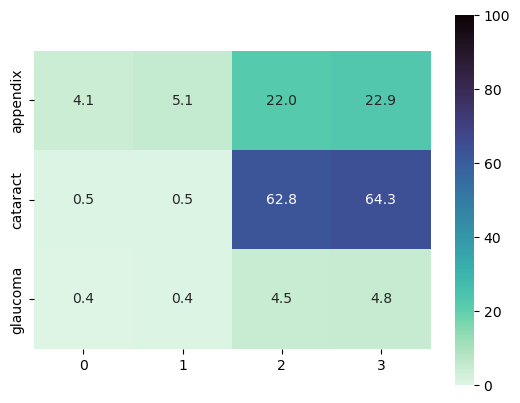

In [12]:
display( sns.heatmap(data=precision_matrix.astype(float), vmin=0, vmax=100, cmap='mako_r', square=True, annot=True, fmt=".1f") )

<Axes: >

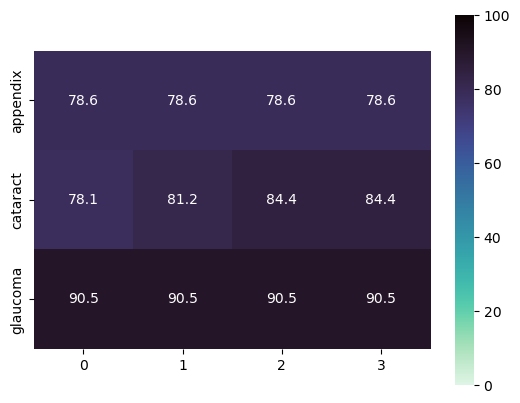

In [13]:
display( sns.heatmap(data=recall_matrix.astype(float), vmin=0, vmax=100, cmap='mako_r', square=True, annot=True, fmt=".1f") )

In [14]:
A_test = pd.read_csv('codelists/output/query_appendix_3_opcs.csv')
B_test = pd.read_csv('codelists/hdruk/Appendicitis.csv')

In [15]:
get_precision_recall(A_test, B_test)

   Precision:  22.92    11  out of  48 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found


(22.916666666666664, 78.57142857142857)